In [3]:
#Import packages

import matplotlib.pyplot as plt
import random
import numpy as np
load('NumericalSemigroup.sage')


true
Successfully loaded Singular


In [4]:
#Test NumericalSemigroup Package
McNuggets = NumericalSemigroup([6,9,20])
print(McNuggets.FrobeniusNumber())
print(McNuggets.LengthSet(400))
print(McNuggets.DeltaSet(400))
print(McNuggets.OmegaPrimality(400))
print(McNuggets.CatenaryDegree(400))
load('KunzPoset.sage')
load('PlotKunzPoset.sage')
PlotKunzPoset([6,9,20])
PlotKunzPoset([5,6,9])
McNuggets.KunzCoordinates()


43
[20, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]
{1, 4}
70
7


[8, 3, 1, 6, 4]

In [5]:
NumericalSemigroup([6,9,20]).gens

[6, 9, 20]

In [6]:
# Estimate function in Expected Frobenious numbers
def estimate(generators, n):
    return ((factorial(n - 1) * prod(generators)) ^ (1 / (n - 1))).n()

# Generates random sample using erdos-renyi model 
def generate_sample(M, p, sample_size):
    semigroups = []
    for j in range(sample_size):
        generators = []
        for i in range(M):
            if random.random() < p:
                generators.append(i)
        if gcd(generators) != 1:
            continue
        semigroups.append(NumericalSemigroup(generators))
    return semigroups
             
def frobenius_numbers(semigroups):
    return [semigroup.FrobeniusNumber() for semigroup in semigroups]

def embedding_dims(semigroups):
    return [len(semigroup.gens) for semigroup in semigroups]



In [7]:
semigroups1 = generate_sample(25000, 0.01, 1000)

9.683


(array([165., 239., 211., 172.,  91.,  83.,  29.,   6.,   3.,   1.]),
 array([ 1. ,  4.2,  7.4, 10.6, 13.8, 17. , 20.2, 23.4, 26.6, 29.8, 33. ]),
 <BarContainer object of 10 artists>)

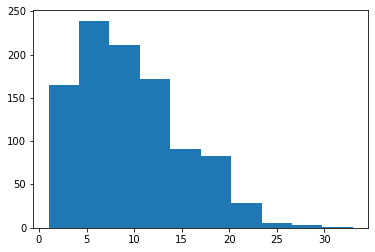

In [18]:
data = embedding_dims(semigroups1)
print(np.mean(data))
# histogram of data
plt.hist(data)

1573.206


(array([191., 306., 230., 138.,  76.,  24.,  22.,   8.,   2.,   3.]),
 array([-1.0000e+00,  6.7340e+02,  1.3478e+03,  2.0222e+03,  2.6966e+03,
         3.3710e+03,  4.0454e+03,  4.7198e+03,  5.3942e+03,  6.0686e+03,
         6.7430e+03]),
 <BarContainer object of 10 artists>)

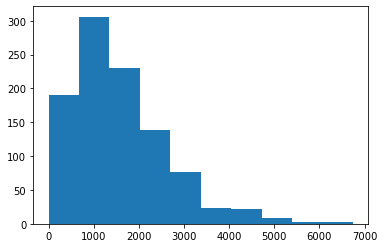

In [ ]:
data = frobenius_numbers(semigroups1)
print(np.mean(data))
plt.hist(data)

In [ ]:

lower_bound_e = lambda p : ((6 - 8*p + 3*p^2)/(2 - 2*p^2 + p^3))
upper_bound_e = lambda p : ((2 - p^2)/(p))

lower_bound_g = lambda p : ((6 - 14*p + 11*p^2 + 3*p^2)/(2*p - 2*p^3 - p^4))
upper_bound_g = lambda p : ((1 - p)*(2 - p^2)/(p^2))

#Example
p = np.array([0.01])
print(lower_bound_g(p[0]), 2*upper_bound_g(p[0]))

293.0994564953778 39598.02


In [ ]:
upper = -0.6
lower = -3
n_samples = 15
x = np.logspace(upper, lower, n_samples)
samples = []
M = 25000
n = 1000
for i in range(n_samples):
    samples.append(generate_sample(M, x[i], n))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [ ]:
data_frobenius = np.array([np.mean(frobenius_numbers(sample)) for sample in samples])
data_embedding = np.array([np.mean(embedding_dims(sample)) for sample in samples])

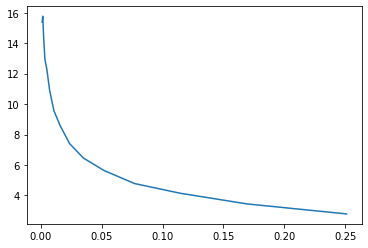

In [ ]:
plt.plot(x, data_embedding)

In [ ]:
plt.plot(1/x, data_embedding)
plt.plot(1/x, np.log(1/x))

NameError: name 'plt' is not defined

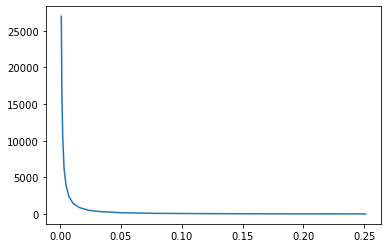

In [ ]:
plt.plot(x, data_frobenius)

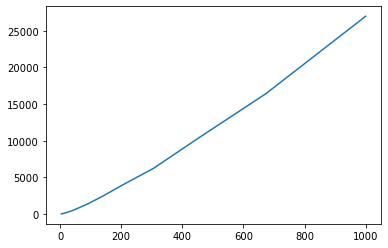

In [ ]:
plt.plot(1/x, data_frobenius)

False

In [ ]:
import pandas as pd
table = pd.DataFrame()
table['p'] = x
table['1/p'] = 1/x
table['E(e(S)) lower bound'] = [lower_bound_e(p) for p in x]
table['E(e(S))'] = data_embedding
table['E(e(S)) upper bound'] = [2*upper_bound_e(p) for p in x]
table['(1/p) / E(e(S))'] = (1/x)/data_embedding
table['E(F(S)) lower bound'] = [lower_bound_g(p) for p in x]
table['E(F(s))'] = data_frobenius
table['E(F(S)) upper bound'] = [2*upper_bound_g(p) for p in x]
table['(1/p) / E(F(s))'] = (1/x)/data_frobenius
table

,p,1/p,E(e(S)) lower bound,E(e(S)),E(e(S)) upper bound,(1/p) / E(e(S)),E(F(S)) lower bound,E(F(s)),E(F(S)) upper bound,(1/p) / E(F(s))
0,0.251189,3.981072,2.211924,2.783,15.421910,1.430496,7.213866,13.759,4.597382e+01,0.289343
1,0.169267,5.907838,2.429631,3.441,23.292818,1.716896,12.290315,29.075,1.143174e+02,0.203193
2,0.114062,8.767124,2.595103,4.147,34.840371,2.114088,20.380081,54.998,2.706095e+02,0.159408
3,0.076862,13.010252,2.716846,4.780,51.887284,2.721810,32.769833,95.679,6.231794e+02,0.135978
4,0.051795,19.306977,2.804173,5.636,77.124320,3.425652,51.425026,172.910,1.411913e+03,0.111659
5,0.034903,28.651203,2.865647,6.455,114.535006,4.438606,79.296209,301.915,3.167031e+03,0.094898
6,0.023520,42.517863,2.908342,7.405,170.024413,5.741778,120.785826,502.112,7.059050e+03,0.084678
7,0.015849,63.095734,2.937713,8.572,252.351240,7.360678,182.444337,879.222,1.566994e+04,0.071763
8,0.010680,93.632921,2.957787,9.557,374.510324,9.797313,274.004943,1446.217,3.469199e+04,0.064743
9,0.007197,138.949549,2.971444,10.870,555.783804,12.782847,409.920334,2422.891,7.667013e+04,0.057349


In [ ]:
# Generate samples 
upper = 4
lower = 1000
n_samples = 15
x = 1/np.linspace(upper, lower, n_samples)
samples = []
M = 100000
n = 1000
for i in range(n_samples):
    samples.append(generate_sample(M, x[i], n))

data_frobenius = np.array([np.mean(frobenius_numbers(sample)) for sample in samples])
data_embedding = np.array([np.mean(embedding_dims(sample)) for sample in samples])

# Table
table = pd.DataFrame()
table['p'] = x
table['1/p'] = 1/x
table['E(e(S)) lower bound'] = [lower_bound_e(p) for p in x]
table['E(e(S))'] = data_embedding
table['E(e(S)) upper bound'] = [2*upper_bound_e(p) for p in x]
table['(1/p) / E(e(S))'] = (1/x)/data_embedding
table['E(F(S)) lower bound'] = [lower_bound_g(p) for p in x]
table['E(F(s))'] = data_frobenius
table['E(F(S)) upper bound'] = [2*upper_bound_g(p) for p in x]
table['(1/p) / E(F(s))'] = (1/x)/data_frobenius
table

,p,1/p,E(e(S)) lower bound,E(e(S)),E(e(S)) upper bound,(1/p) / E(e(S)),E(F(S)) lower bound,E(F(s)),E(F(S)) upper bound,(1/p) / E(F(s))
0,0.250000,4.000000,2.214876,2.771,15.500000,1.443522,7.260504,13.689,4.650000e+01,0.292205
1,0.013308,75.142857,2.947552,8.798,300.544813,8.540902,218.560693,1068.820,2.228325e+04,0.070305
2,0.006836,146.285714,2.972865,10.868,585.129185,13.460224,431.925247,2541.163,8.501091e+04,0.057566
3,0.004599,217.428571,2.981698,12.267,869.705087,17.724674,645.331591,4258.454,1.882290e+05,0.051058
4,0.003465,288.571429,2.986192,12.843,1154.278784,22.469161,858.748873,5792.217,3.319376e+05,0.049821
5,0.002780,359.714286,2.988915,13.318,1438.851583,27.009633,1072.170615,7454.253,5.161366e+05,0.048256
6,0.002321,430.857143,2.990740,14.003,1723.423930,30.768917,1285.594609,9403.151,7.408261e+05,0.045821
7,0.001992,502.000000,2.992050,15.053,2007.996016,33.348834,1499.019899,11696.280,1.006006e+06,0.042920
8,0.001745,573.142857,2.993035,15.340,2292.567939,37.362637,1712.446002,13588.441,1.311676e+06,0.042179
9,0.001552,644.285714,2.993802,15.822,2577.139753,40.720877,1925.872651,15795.893,1.657837e+06,0.040788


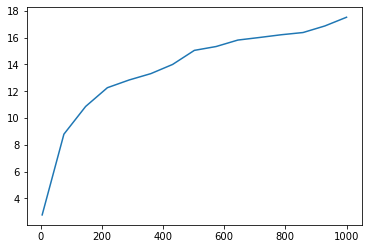

In [ ]:
plt.plot(1/x, data_embedding)

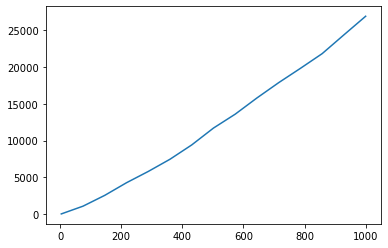

In [ ]:
plt.plot(1/x, data_frobenius)

In [ ]:
# Generate samples 
upper = 4
lower = 10000
n_samples = 100
x = 1/np.linspace(upper, lower, n_samples)
samples = []
M = 100000
n = 1000
for i in range(n_samples):
    samples.append(generate_sample(M, x[i], n))

data_frobenius = np.array([np.mean(frobenius_numbers(sample)) for sample in samples])
data_embedding = np.array([np.mean(embedding_dims(sample)) for sample in samples])

# Table
table = pd.DataFrame()
table['p'] = x
table['1/p'] = 1/x
table['E(e(S)) lower bound'] = [lower_bound_e(p) for p in x]
table['E(e(S))'] = data_embedding
table['E(e(S)) upper bound'] = [2*upper_bound_e(p) for p in x]
table['(1/p) / E(e(S))'] = (1/x)/data_embedding
table['E(F(S)) lower bound'] = [lower_bound_g(p) for p in x]
table['E(F(s))'] = data_frobenius
table['E(F(S)) upper bound'] = [2*upper_bound_g(p) for p in x]
table['(1/p) / E(F(s))'] = (1/x)/data_frobenius
table

,p,1/p,E(e(S)) lower bound,E(e(S)),E(e(S)) upper bound,(1/p) / E(e(S)),E(F(S)) lower bound,E(F(s)),E(F(S)) upper bound,(1/p) / E(F(s))
0,0.250000,4.000000,2.214876,2.748000,15.500000,1.455604,7.260504,1.378500e+01,4.650000e+01,0.290170
1,0.009527,104.969697,2.962297,10.096000,419.859735,10.397157,308.003863,1.713696e+03,4.365269e+04,0.061253
2,0.004856,205.939394,2.980682,11.768000,823.747864,17.499948,610.866611,3.880033e+03,1.688184e+05,0.053077
3,0.003258,306.909091,2.987014,12.804000,1227.629847,23.969782,913.759797,6.076914e+03,3.755431e+05,0.050504
4,0.002452,407.878788,2.990220,13.785000,1631.510248,29.588595,1216.660848,8.887793e+03,6.638269e+05,0.045892
...,...,...,...,...,...,...,...,...,...,...
95,0.000104,9596.121212,2.999583,10.047094,38384.484640,955.114089,28781.364678,2.128542e+06,3.683038e+08,0.004508
96,0.000103,9697.090909,2.999588,10.127382,38788.363430,957.512096,29084.273758,4.370376e+06,3.760955e+08,0.002219
97,0.000102,9798.060606,2.999592,9.865927,39192.242220,993.121091,29387.182839,5.487945e+06,3.839688e+08,0.001785
98,0.000101,9899.030303,2.999596,9.840040,39596.121010,1005.994900,29690.091919,4.092497e+06,3.919236e+08,0.002419


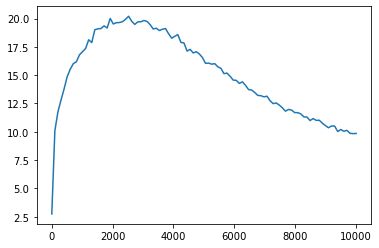

In [ ]:
plt.plot(1/x, data_embedding)

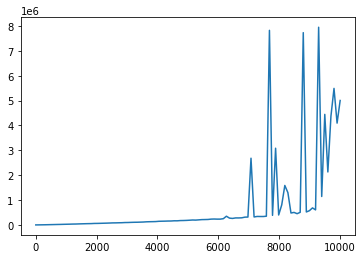

In [ ]:
plt.plot(1/x, data_frobenius)

In [ ]:
n = 30000
sum = 0
p = 0.01
for i in range(n):
    sum += ((1 - p)**(sqrt(i)))*(1 + sqrt(i)*p)
print(sum.n())

20274.0555032142


In [ ]:
print(sum.n())

265.879602864694


In [87]:
# Back semigroups with fixed frobenius number
def random_back_semigroup_ffn(frobenius_number, p):
    generators = list(range(frobenius_number + 1, 2 * frobenius_number + 2))
    semigroup = NumericalSemigroup(generators)
    for i in range(frobenius_number - 1, 0, -1):
        if random.random() < p:
            if NumericalSemigroup(generators + [i]).FrobeniusNumber() == frobenius_number:
                generators.append(i)
                semigroup = NumericalSemigroup(generators)
                generators = semigroup.gens
    return semigroup
                                                              

In [206]:
test = random_back_semigroup_ffn(20, 0.3)
test

Numerical Semigroup generated by [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]

(array([179., 200., 366.,  95., 132.,  22.,   3.,   2.,   0.,   1.]),
 array([ 3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. , 16.5, 18. ]),
 <BarContainer object of 10 artists>)

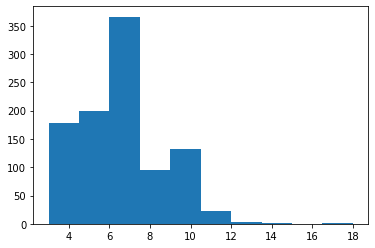

In [214]:
random_back_list = []
for i in range(1000):
    random_back_list.append(random_back_semigroup_ffn(20, 0.5))
plt.hist(embedding_dims(random_back_list), bins = 20)


(array([ 58., 121., 200.,   0., 185., 181.,  95.,   0.,  89.,  43.,  22.,
          0.,   1.,   2.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([ 3.  ,  3.75,  4.5 ,  5.25,  6.  ,  6.75,  7.5 ,  8.25,  9.  ,
         9.75, 10.5 , 11.25, 12.  , 12.75, 13.5 , 14.25, 15.  , 15.75,
        16.5 , 17.25, 18.  ]),
 <BarContainer object of 20 artists>)

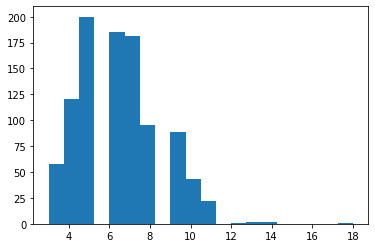

In [216]:
plt.hist(embedding_dims(random_back_list), bins = 20)

In [215]:
sorted(embedding_dims(random_back_list))

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,


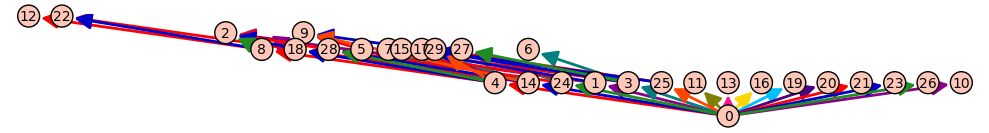

In [162]:
PlotKunzPoset(test)

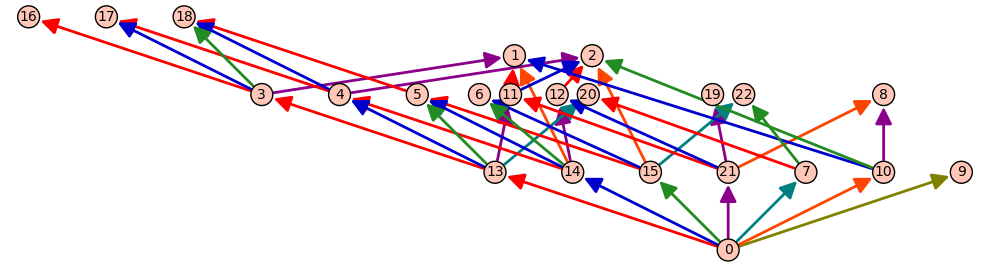

In [158]:
PlotKunzPoset(test.gens)       